In [231]:
import os
os.getcwd()


'c:\\Users\\seenu\\AVS CODE\\Height_weight_predictions'

In [232]:
# linearalgebra
import numpy as np

import pandas as pd

# Visulaizations

import matplotlib.pyplot as plt
import seaborn as sns

# preproecessing

from sklearn.preprocessing import StandardScaler

# Splitting

from sklearn.model_selection import train_test_split

#import Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#

from sklearn.metrics import mean_squared_error


In [233]:
df=pd.read_csv('SOCR-HeightWeight.csv')
df.head()



,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [234]:
#convert weight to kg
df['Weight_kg']=df['Weight(Pounds)']*0.453592

#Convert Height inches to desired format (Feet.inches)
df['Height(Feet.Inches)']=df['Height(Inches)'] //12+ (df["Height(Inches)"]%12)/10

In [235]:
df.describe()


,Index,Height(Inches),Weight(Pounds),Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421,57.642209,5.795967
std,7217.022701,1.901679,11.660898,5.289290,0.183513
min,1.000000,60.278360,78.014760,35.386871,5.027836
25%,6250.750000,66.704397,119.308675,54.117461,5.670440
50%,12500.500000,67.995700,127.157750,57.677738,5.799570
75%,18750.250000,69.272958,134.892850,61.186318,5.927296
max,25000.000000,75.152800,170.924000,77.529759,6.315280


In [236]:
drop_col=['Index','Height(Inches)','Weight(Pounds)']
df=df.drop(columns=drop_col,axis=1)

In [237]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
3889,53.295382,5.448357
7229,53.664968,5.723841
21727,61.949645,6.091437


In [238]:
df.shape  #checking the shape of data

(25000, 2)

In [239]:
df.isna().sum()  #checking the null values of data

Weight_kg              0
Height(Feet.Inches)    0
dtype: int64

In [240]:
df.dtypes

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [241]:
df.corr()  #correlation

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


In [242]:
df.describe()

,Weight_kg,Height(Feet.Inches)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


<Axes: xlabel='Height(Feet.Inches)'>

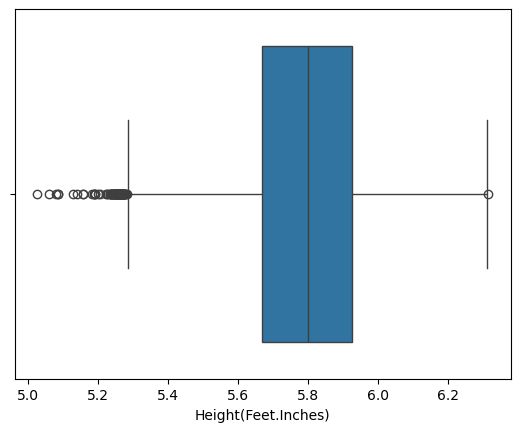

In [243]:
#check outliers using boxplot
sns.boxplot(x=df['Height(Feet.Inches)'])

<Axes: xlabel='Weight_kg'>

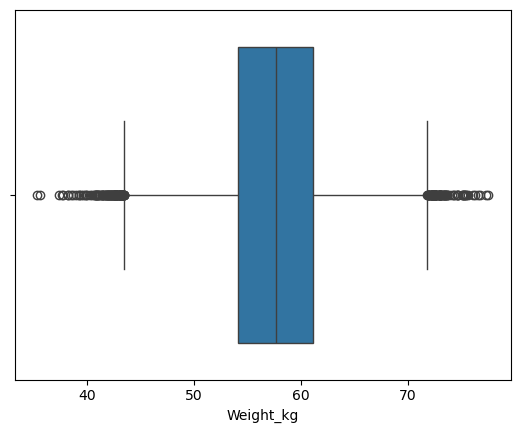

In [244]:
sns.boxplot(x=df['Weight_kg'])

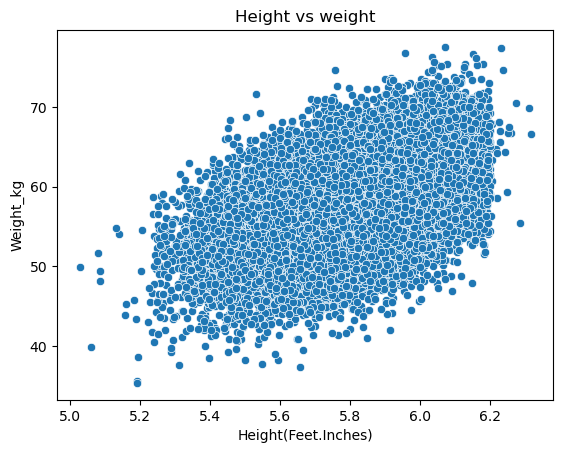

In [245]:
x=df['Height(Feet.Inches)']
y=df['Weight_kg']

sns.scatterplot(x=x,y=y)
plt.title("Height vs weight")
plt.xlabel('Height(Feet.Inches)')
plt.ylabel('Weight_kg')
plt.show()


In [246]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
10137,54.177981,5.808186
11214,51.085844,5.333119
19401,53.314070,5.682918


In [247]:
X=df.iloc[:,1]  #weight is independent variable
y=df.iloc[:,0]  # Height is dependent variable

In [248]:
X

0        5.578331
1        6.151521
2        5.939874
3        5.821660
4        5.778781
           ...   
24995    5.950215
24996    5.454826
24997    5.469855
24998    5.752918
24999    5.887761
Name: Height(Feet.Inches), Length: 25000, dtype: float64

In [249]:
y

0        51.252494
1        61.909547
2        69.411778
3        64.562199
4        65.452010
           ...    
24995    53.538008
24996    54.518674
24997    53.644285
24998    59.995797
24999    56.641938
Name: Weight_kg, Length: 25000, dtype: float64

In [250]:
df.columns[1]

'Height(Feet.Inches)'

In [251]:
df.columns[0]

'Weight_kg'

In [252]:
# Data Scaling (Preprocessing data)
scaler_X= StandardScaler()
X_scaled=scaler_X.fit_transform(X.values.reshape(-1,1))

scaler_y=StandardScaler()
y_scaled=scaler_y.fit_transform(y.values.reshape(-1,1))


split data into 80% and 20%

In [253]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
print("shape of training data")
print(X_train.shape)
print(y_train.shape)

print("shape of testing data")
print(X_test.shape)
print(y_test.shape)

shape of training data
(20000,)
(20000,)
shape of testing data
(5000,)
(5000,)


In [255]:
# Linear regression model X should be 2d array so we are reshaping to 2d array

# Reshape training data
X_train_2d=X_train.values.reshape(-1,1)
y_train_2d=y_train.values.reshape(-1,1)

#Reshape testing data
# Reshape testing data
X_test_2d = X_test.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

print("Shape of training data (X):", X_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", X_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)




Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [256]:
lr=LinearRegression()
lr

LinearRegression()

In [257]:
lr.fit(X_train_2d,y_train_2d)

LinearRegression()

In [258]:
y_pred=lr.predict(X_test_2d)
y_pred[:10]

array([[58.30995889],
       [57.55379225],
       [57.21368631],
       [59.15305375],
       [59.14955828],
       [57.21726773],
       [54.13829253],
       [57.67365521],
       [60.77133975],
       [58.75644733]])

In [259]:
y_test_2d[:10]

array([[60.91082852],
       [50.78715403],
       [61.68266066],
       [57.32504768],
       [45.44130015],
       [48.93509253],
       [56.34655902],
       [60.25330155],
       [59.08262596],
       [63.5877017 ]])

In [260]:
mean_squared_error(y_pred,y_test_2d)

21.232939817362524

# Decision Time Regressor

In [261]:
model_dtr=DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [262]:
model_dtr.fit(X_train_2d,y_train_2d)
model_dtr

DecisionTreeRegressor()

In [263]:
y_pred_dtr=model_dtr.predict(X_test_2d)
y_pred_dtr[:10]

array([53.40614888, 47.98372867, 58.31968422, 52.68566334, 57.0185102 ,
       55.81358842, 54.73145398, 50.68808953, 58.78946945, 50.35941677])

In [264]:
mean_squared_error(y_pred_dtr,y_test_2d)

40.98078515849597

### Random forest Regressor

In [265]:
model_rfr=RandomForestRegressor()
model_rfr.fit(X_train_2d,y_train_2d)

c:\Users\seenu\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [266]:
y_pred_rfr=model_rfr.predict(X_test_2d)
y_pred_rfr[:10]

array([53.52870399, 50.6514681 , 57.61566362, 54.67537141, 59.67148091,
       56.12972753, 54.93420008, 51.85342227, 57.62346495, 52.68569963])

In [267]:
mean_squared_error(y_pred_rfr,y_test_2d)

30.33824284283273

## Hyper Parameter tuning

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_2d, y_train_2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.951832946201606


In [269]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, X_train_2d, y_train_2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)


MSE Scores: [20.89965582 21.67357185 22.39972494 20.26920314 20.56598084 20.7416008
 20.67197687 20.67941739 21.2313776  20.38123774]


### Final model

In [270]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model with the best parameters
final_model = LinearRegression(fit_intercept=False, copy_X=True)

# Fit the model to the entire training data
final_model.fit(X_train_2d, y_train_2d)

# Now you can use final_model to make predictions on new data


LinearRegression(fit_intercept=False)

## Convert to pickle file

In [271]:
import pickle

# Define the filename for the pickle file
filename = 'final_model.pkl'

# Save the final_model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(final_model,file)


In [272]:
os.path.abspath('final_model.pkl')

'c:\\Users\\seenu\\AVS CODE\\Height_weight_predictions\\final_model.pkl'

In [273]:
import pickle
import numpy as np

# Load the saved model from the file
filename = 'final_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Input height for prediction
height_input = 6.0

# Reshape the input height to match the shape expected by the model (2D array)
height_input_2d = np.array(height_input).reshape(1, -1)

# Use the loaded model to make predictions
predicted_weight = loaded_model.predict(height_input_2d)

# Print the predicted weight
print("Predicted weight:", predicted_weight[0, 0])


Predicted weight: 59.69879152974141


In [274]:
os.getcwd()

'c:\\Users\\seenu\\AVS CODE\\Height_weight_predictions'